# Project 08 -- [Pavan Kumar] [Battula]

**TA Help:** N/A

- Help with figuring out how to write a function.
    
**Collaboration:** N/A
    
- Helped figuring out how to load the dataset.
- Helped debug error with my plot.

## Question 1

In [1]:
import pandas as pd

In [2]:
myDF = pd.read_parquet( "/anvil/projects/tdm/data/whin/weather.parquet")

In [4]:
pd.set_option('display.max_columns', None)

In [6]:
#converting into datetime
myDF['observation_time'] = pd.to_datetime(myDF['observation_time'])

In [7]:
myDF.head(2)

,station_id,latitude,longitude,name,observation_time,temperature,temperature_high,temperature_low,humidity,solar_radiation,solar_radiation_high,rain,rain_inches_last_hour,wind_speed_mph,wind_direction_degrees,wind_gust_speed_mph,wind_gust_direction_degrees,pressure,soil_temp_1,soil_temp_2,soil_temp_3,soil_temp_4,soil_moist_1,soil_moist_2,soil_moist_3,soil_moist_4
0,1,40.93894,-86.47418,WHIN001-PULA001,2019-07-10 04:00:00+00:00,70.0,71.0,70.0,83.0,NaN,NaN,0.0,0.0,0.0,NaN,3.0,247.5,30.05,77.0,78.0,76.0,74.0,24.0,24.0,10.0,9.0
1,1,40.93894,-86.47418,WHIN001-PULA001,2019-07-10 04:15:00+00:00,69.0,70.0,69.0,84.0,NaN,NaN,0.0,0.0,1.0,247.5,3.0,247.5,30.04,76.0,78.0,76.0,74.0,24.0,25.0,10.0,9.0


In [8]:
#creating year column from the observation_time
myDF['year'] = myDF['observation_time'].dt.year


#creating month column from the observation_time
myDF['month'] = myDF['observation_time'].dt.month


#creating month column from the observation_time
myDF['day'] = myDF['observation_time'].dt.day

myDF[['year', 'month','day']].head(2)

,year,month,day
0,2019,7,10
1,2019,7,10


In [9]:
my_station_id = 1

In [10]:
myDF[myDF['station_id'] == my_station_id].groupby(['year','month'])['temperature'].mean()

year  month
2019  7         1.699000
      8        58.450756
      9        68.906912
      10       53.950605
      11       35.828114
      12       34.838319
2020  1        32.782521
      2        30.199713
      3        42.102590
      4        48.237153
      5        60.180444
      6        73.109375
      7        76.111970
      8        71.325480
      9        64.010424
      10       51.814454
      11       46.175652
      12       32.706989
2021  1        29.468571
      2        21.116115
      3        44.176194
      4        50.613834
      5        59.466555
      6        73.381730
      7        72.553822
Name: temperature, dtype: float64

In [11]:
my_station_id = 67
myDF[myDF['station_id'] == my_station_id].groupby(['year','month'])['temperature'].mean()

year  month
2020  1        26.342484
      2        26.172275
      8        71.221968
      9        59.903183
      10       42.062350
      11       48.972222
2021  4        44.349741
Name: temperature, dtype: float64

In [12]:
def get_avg_temp (my_station_id):
    
    result=myDF[myDF['station_id'] == my_station_id].groupby(['year','month'])['temperature'].mean()
    
    return result

In [13]:
get_avg_temp(1)

year  month
2019  7         1.699000
      8        58.450756
      9        68.906912
      10       53.950605
      11       35.828114
      12       34.838319
2020  1        32.782521
      2        30.199713
      3        42.102590
      4        48.237153
      5        60.180444
      6        73.109375
      7        76.111970
      8        71.325480
      9        64.010424
      10       51.814454
      11       46.175652
      12       32.706989
2021  1        29.468571
      2        21.116115
      3        44.176194
      4        50.613834
      5        59.466555
      6        73.381730
      7        72.553822
Name: temperature, dtype: float64

In [14]:
get_avg_temp(67)

year  month
2020  1        26.342484
      2        26.172275
      8        71.221968
      9        59.903183
      10       42.062350
      11       48.972222
2021  4        44.349741
Name: temperature, dtype: float64

The both are matched.

## Question 2

In [15]:
import matplotlib.pyplot as plt

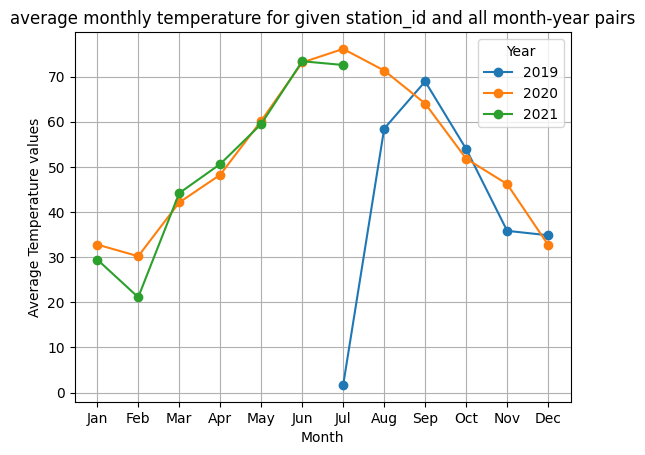

In [16]:
result = get_avg_temp(1)
result.unstack(0).plot(kind = 'line', marker='o')
plt.title(f'average monthly temperature for given station_id and all month-year pairs')
plt.xlabel('Month')
plt.ylabel('Average Temperature values')
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec'])
plt.legend(title = 'Year')
plt.grid(True)
plt.show()

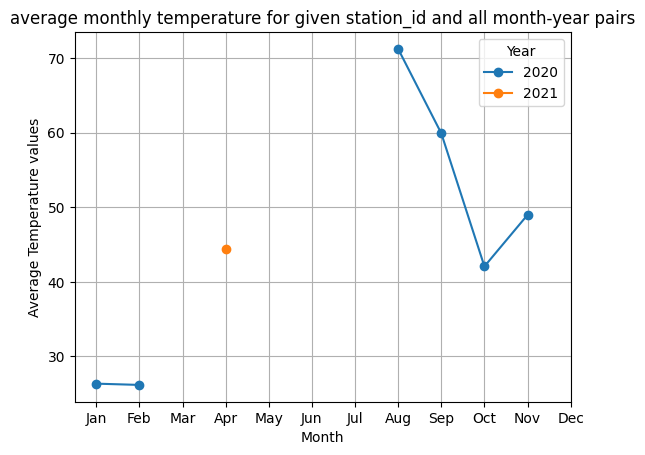

In [86]:
result = get_avg_temp(67)
result.unstack(0).plot(kind = 'line', marker='o')
plt.title(f'average monthly temperature for given station_id and all month-year pairs')
plt.xlabel('Month')
plt.ylabel('Average Temperature values')
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec'])
plt.legend(title = 'Year')
plt.grid(True)
plt.show()

In [17]:
def get_avg_temp_and_plot (my_station_id):
    
    result = get_avg_temp(my_station_id)
    plot_line = result.unstack(0).plot(kind = 'line', marker='o')
    plt.title(f'average monthly temperature for given station_id and all month-year pairs')
    plt.xlabel('Month')
    plt.ylabel('Average Temperature values')
    plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec'])
    plt.legend(title = 'Year')
    plt.grid(True)
    plt.show()
    return plot_line
    

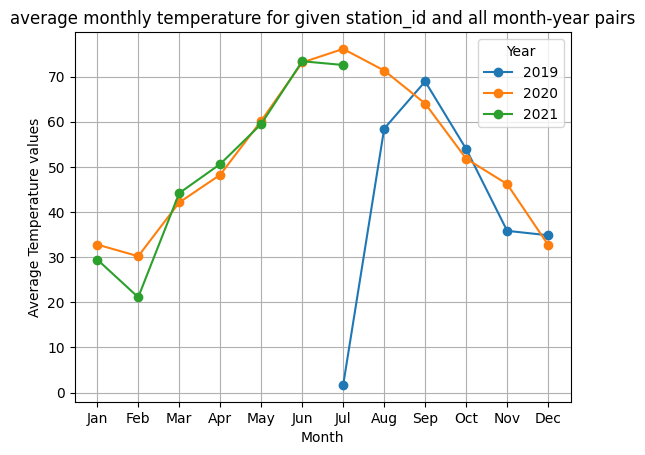

<Axes: title={'center': 'average monthly temperature for given station_id and all month-year pairs'}, xlabel='Month', ylabel='Average Temperature values'>

In [18]:
get_avg_temp_and_plot(1)

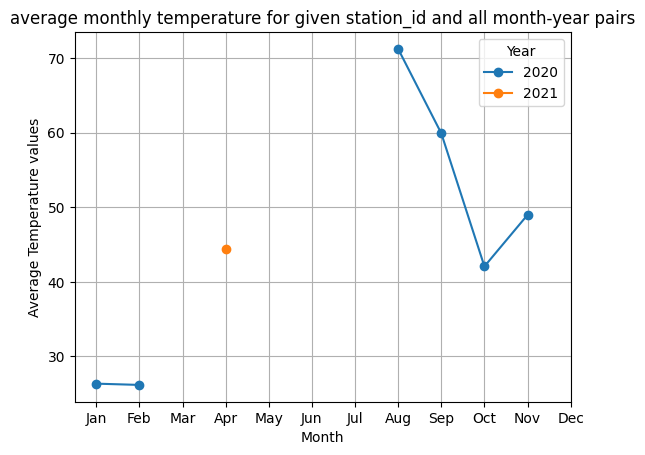

<Axes: title={'center': 'average monthly temperature for given station_id and all month-year pairs'}, xlabel='Month', ylabel='Average Temperature values'>

In [88]:
get_avg_temp_and_plot(67)

## Question 3

In [19]:
my_station_id = 1

In [20]:
myDF[myDF['station_id'] == my_station_id].groupby(['year','month'])['temperature'].max()

year  month
2019  7        90.0
      8        89.0
      9        90.0
      10       91.0
      11       58.0
      12       64.0
2020  1        58.0
      2        59.0
      3        66.0
      4        79.0
      5        90.0
      6        92.0
      7        94.0
      8        92.0
      9        86.0
      10       83.0
      11       79.0
      12       57.0
2021  1        46.0
      2        60.0
      3        71.0
      4        82.0
      5        87.0
      6        94.0
      7        89.0
Name: temperature, dtype: float64

In [89]:
my_station_id = 5

In [90]:
myDF[myDF['station_id'] == my_station_id].groupby(['year','month'])['temperature'].max()

year  month
2019  7        93.0
      8        88.0
      9        89.0
      10       89.0
      11       57.0
      12       64.0
2020  1        58.0
      2        58.0
      3        67.0
      4        78.0
      5        89.0
      6        93.0
      7        93.0
      8        90.0
      9        84.0
      10       83.0
      11       78.0
      12       57.0
2021  1        45.0
      2        61.0
      3        71.0
      4        82.0
      5        89.0
      6        94.0
      7        87.0
Name: temperature, dtype: float64

In [23]:
def get_max_temp (my_station_id):
    
    result=myDF[myDF['station_id'] == my_station_id].groupby(['year','month'])['temperature'].max()
    
    return result

In [24]:
get_max_temp(1)

year  month
2019  7        90.0
      8        89.0
      9        90.0
      10       91.0
      11       58.0
      12       64.0
2020  1        58.0
      2        59.0
      3        66.0
      4        79.0
      5        90.0
      6        92.0
      7        94.0
      8        92.0
      9        86.0
      10       83.0
      11       79.0
      12       57.0
2021  1        46.0
      2        60.0
      3        71.0
      4        82.0
      5        87.0
      6        94.0
      7        89.0
Name: temperature, dtype: float64

In [92]:
get_max_temp(5)

year  month
2019  7        93.0
      8        88.0
      9        89.0
      10       89.0
      11       57.0
      12       64.0
2020  1        58.0
      2        58.0
      3        67.0
      4        78.0
      5        89.0
      6        93.0
      7        93.0
      8        90.0
      9        84.0
      10       83.0
      11       78.0
      12       57.0
2021  1        45.0
      2        61.0
      3        71.0
      4        82.0
      5        89.0
      6        94.0
      7        87.0
Name: temperature, dtype: float64

In [94]:
def get_max_temp_and_plot (my_station_id):
    
    result = get_max_temp(my_station_id)
    plot_line = result.unstack(0).plot(kind = 'bar')
    plt.title(f'Maximum monthly temperature for given station_id and all month-year pairs')
    plt.xlabel('Month')
    plt.ylabel('Maximum Temperature values')
    plt.xticks(range(0,12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec'])
    plt.legend(title = 'Year')
    plt.grid(True)
    plt.show()
    return plot_line

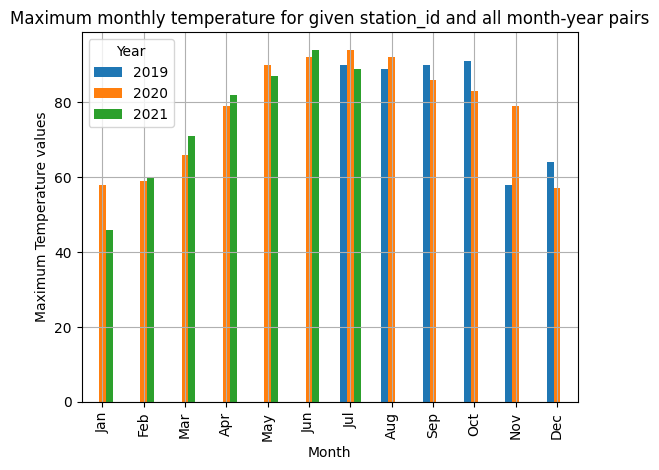

<Axes: title={'center': 'Maximum monthly temperature for given station_id and all month-year pairs'}, xlabel='Month', ylabel='Maximum Temperature values'>

In [27]:
get_max_temp_and_plot(1)

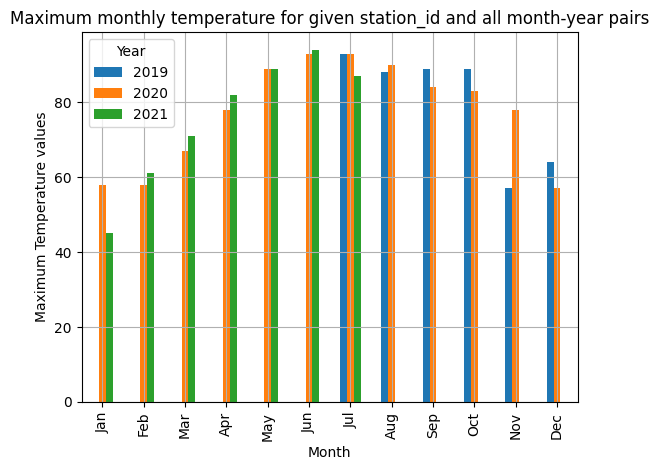

<Axes: title={'center': 'Maximum monthly temperature for given station_id and all month-year pairs'}, xlabel='Month', ylabel='Maximum Temperature values'>

In [95]:
get_max_temp_and_plot(5)

## Question 4

In [29]:
my_station_id = 1
my_year = 2020

In [30]:
my_result = myDF[(myDF['station_id'] == my_station_id) & (myDF['year'] == my_year)]

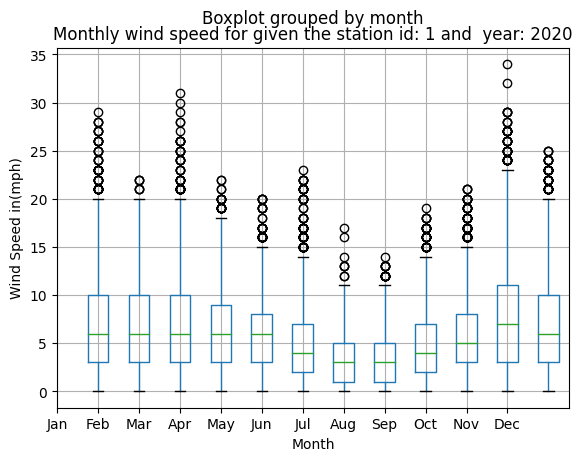

In [31]:
my_result.boxplot(column = 'wind_speed_mph',by = 'month')
plt.title(f'Monthly wind speed for given the station id: {my_station_id} and  year: {my_year}')
plt.xlabel('Month')
plt.ylabel('Wind Speed in(mph)')
plt.xticks(range(0,12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec'])
plt.show()

In [32]:
my_station_id = 5
my_year = 2020

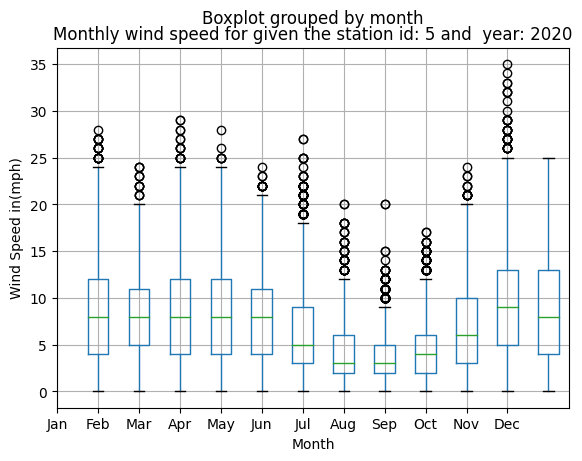

In [33]:
my_result = myDF[(myDF['station_id'] == my_station_id) & (myDF['year'] == my_year)]
my_result.boxplot(column = 'wind_speed_mph',by = 'month')
plt.title(f'Monthly wind speed for given the station id: {my_station_id} and  year: {my_year}')
plt.xlabel('Month')
plt.ylabel('Wind Speed in(mph)')
plt.xticks(range(0,12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec'])
plt.show()

In [34]:
my_station_id = 67
my_year = 2020

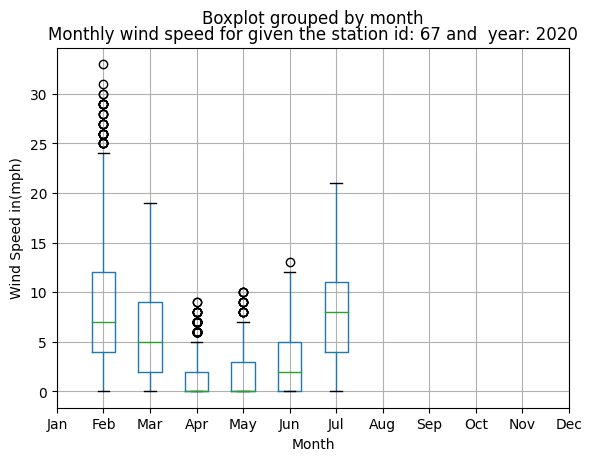

In [35]:
my_result = myDF[(myDF['station_id'] == my_station_id) & (myDF['year'] == my_year)]
my_result.boxplot(column = 'wind_speed_mph',by = 'month')
plt.title(f'Monthly wind speed for given the station id: {my_station_id} and  year: {my_year}')
plt.xlabel('Month')
plt.ylabel('Wind Speed in(mph)')
plt.xticks(range(0,12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec'])
plt.show()

In [36]:
def get_wind_speed_for_id_and_year (my_station_id, my_year):
    
    my_result = myDF[(myDF['station_id'] == my_station_id) & (myDF['year'] == my_year)]
    box_plot = my_result.boxplot(column = 'wind_speed_mph',by = 'month')
    plt.title(f'Monthly wind speed for given the station id: {my_station_id} and  year: {my_year}')
    plt.xlabel('Month')
    plt.ylabel('Wind Speed in(mph)')
    plt.xticks(range(0,12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec'])
    plt.show()
    return box_plot

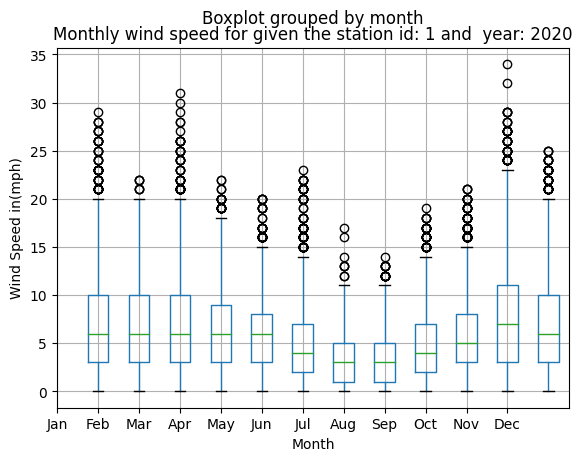

<Axes: title={'center': 'Monthly wind speed for given the station id: 1 and  year: 2020'}, xlabel='Month', ylabel='Wind Speed in(mph)'>

In [37]:
get_wind_speed_for_id_and_year(1, 2020)

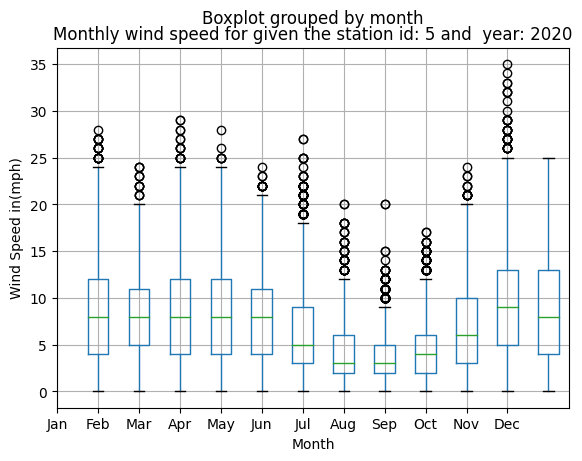

<Axes: title={'center': 'Monthly wind speed for given the station id: 5 and  year: 2020'}, xlabel='Month', ylabel='Wind Speed in(mph)'>

In [38]:
get_wind_speed_for_id_and_year(5, 2020)

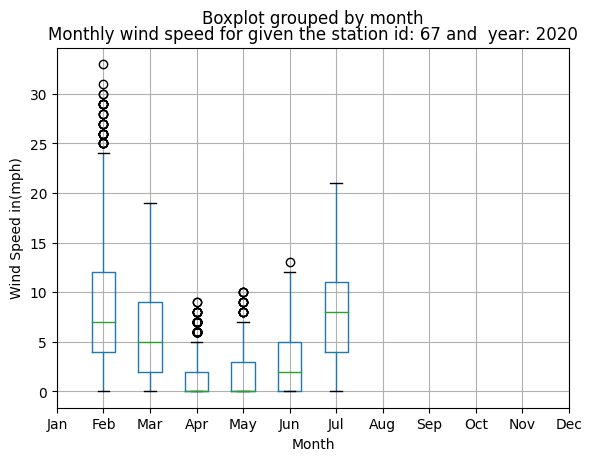

<Axes: title={'center': 'Monthly wind speed for given the station id: 67 and  year: 2020'}, xlabel='Month', ylabel='Wind Speed in(mph)'>

In [96]:
get_wind_speed_for_id_and_year(67, 2020)

## Question 5

In [40]:
myDF[['wind_speed_mph', 'pressure', 'soil_temp_1', 'soil_moist_1']].head(); # checking the values of parameters

,wind_speed_mph,pressure,soil_temp_1,soil_moist_1
0,0.0,30.05,77.0,24.0
1,1.0,30.04,76.0,24.0
2,2.0,29.89,80.0,31.0
3,2.0,29.88,80.0,31.0
4,2.0,29.88,80.0,32.0


In [55]:
#input parameters
my_station_id = 3
my_year = 2020

In [60]:
my_parameters = myDF[(myDF['station_id'] == my_station_id) & (myDF['year'] == my_year)].groupby(['month'])[['wind_speed_mph', 'pressure', 'soil_temp_1', 'soil_moist_1']].mean()

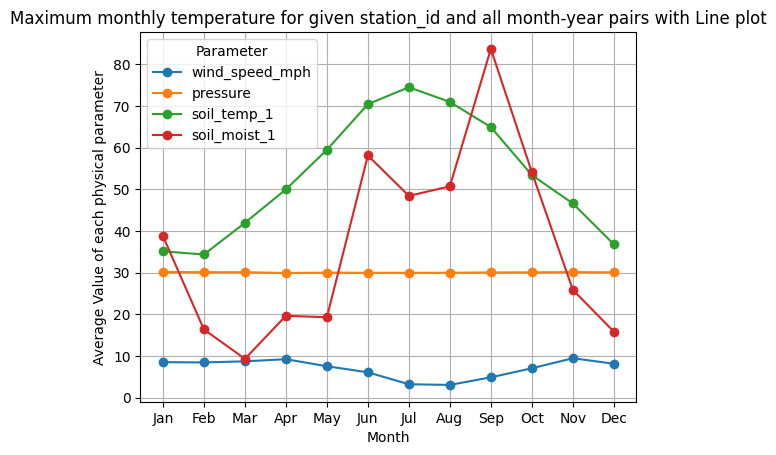

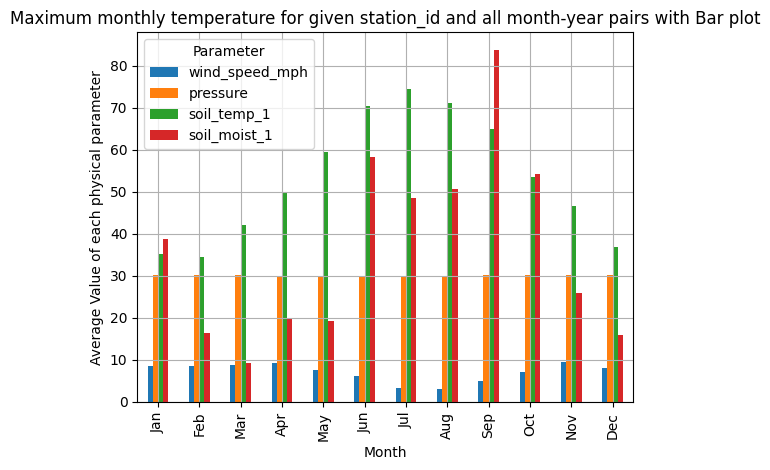

In [81]:
    #Line plot
    plot_line1 = my_parameters.plot(kind = 'line', marker = 'o')
    plt.title(f'Maximum monthly temperature for given station_id and all month-year pairs with Line plot')
    plt.xlabel('Month')
    plt.ylabel('Average Value of each physical parameter')
    plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec'])
    plt.legend(title = 'Parameter')
    plt.grid(True)
    plt.show()
    
    # Bar plot
    plot_line2 = my_parameters.plot(kind = 'bar')
    plt.title(f'Maximum monthly temperature for given station_id and all month-year pairs with Bar plot')
    plt.xlabel('Month')
    plt.ylabel('Average Value of each physical parameter')
    plt.xticks(range(0,12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec'])
    plt.legend(title = 'Parameter')
    plt.grid(True)
    plt.show()



In [82]:

# input are statiod_id and year
# finds the average values of various parameters like wind speed, presure, temperatute, and moist.
def get_avg_of_diff_parameters_given_s_id_and_year (my_station_id, my_year):
    
    # finding average values of each parameters by month.
    my_parameters = myDF[(myDF['station_id'] == my_station_id) & (myDF['year'] == my_year)].groupby(['month'])[['wind_speed_mph', 'pressure', 'soil_temp_1', 'soil_moist_1']].mean()
    
    #Line plot
    line_plot = my_parameters.plot(kind = 'line', marker = 'o')
    plt.title(f'Maximum monthly temperature for given station_id and all month-year pairs with Line plot')
    plt.xlabel('Month')
    plt.ylabel('Average Value of each physical parameter')
    plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec'])
    plt.legend(title = 'Parameter')
    plt.grid(True)
    plt.show()
    
    # Bar plot
    bar_plot = my_parameters.plot(kind = 'bar')
    plt.title(f'Maximum monthly temperature for given station_id and all month-year pairs with Bar plot')
    plt.xlabel('Month')
    plt.ylabel('Average Value of each physical parameter')
    plt.xticks(range(0,12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec'])
    plt.legend(title = 'Parameter')
    plt.grid(True)
    plt.show()
    
    return line_plot, bar_plot

# returs the [plots and visiulize the values.

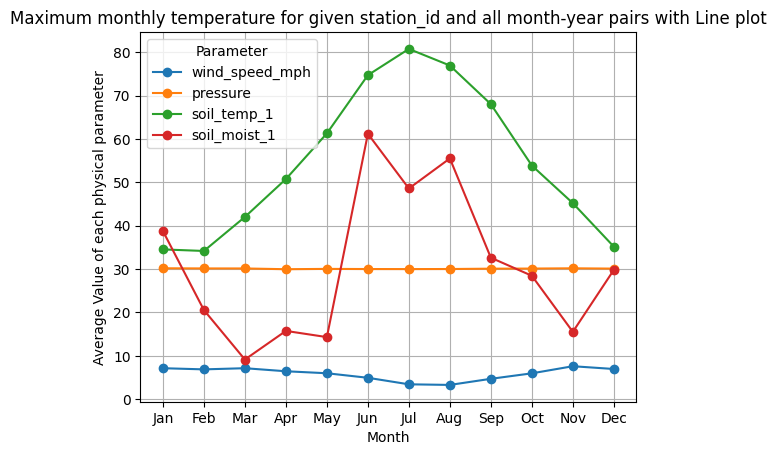

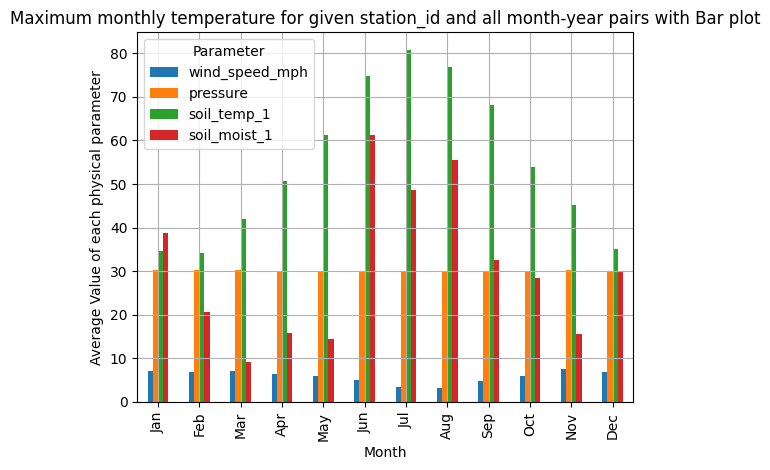

(<Axes: title={'center': 'Maximum monthly temperature for given station_id and all month-year pairs with Line plot'}, xlabel='Month', ylabel='Average Value of each physical parameter'>,
 <Axes: title={'center': 'Maximum monthly temperature for given station_id and all month-year pairs with Bar plot'}, xlabel='Month', ylabel='Average Value of each physical parameter'>)

In [84]:
get_avg_of_diff_parameters_given_s_id_and_year(1, 2020)

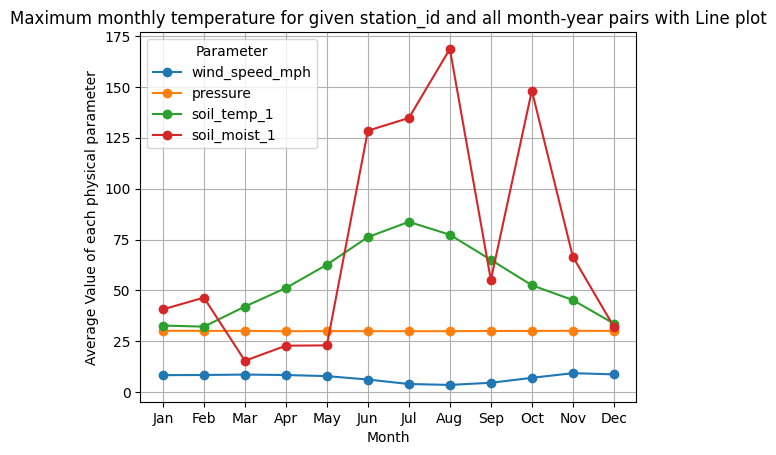

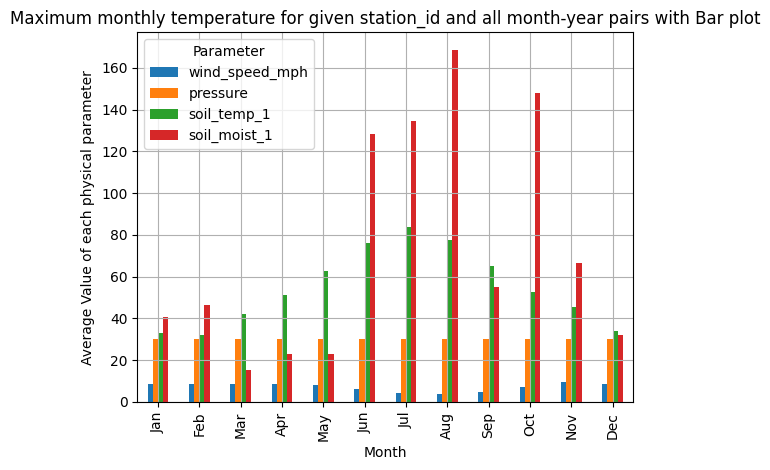

(<Axes: title={'center': 'Maximum monthly temperature for given station_id and all month-year pairs with Line plot'}, xlabel='Month', ylabel='Average Value of each physical parameter'>,
 <Axes: title={'center': 'Maximum monthly temperature for given station_id and all month-year pairs with Bar plot'}, xlabel='Month', ylabel='Average Value of each physical parameter'>)

In [85]:
get_avg_of_diff_parameters_given_s_id_and_year(5, 2020)

Markdown notes and sentences and analysis written here.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.